In [1]:
import torch
import torch.optim as opt
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np 
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
%matplotlib inline

In [2]:
mb_size = 64
transform = transforms.ToTensor()
traindata = torchvision.datasets.MNIST('/home/davidpqc1231/GAN/Paper', download=True, transform=transform, train = True)
trainloader = torch.utils.data.DataLoader(traindata, shuffle=True, batch_size=mb_size)

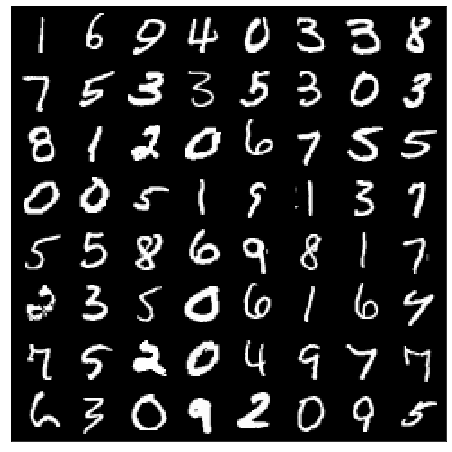

torch.Size([64, 1, 28, 28])


In [3]:
dataiter = iter(trainloader)
imgs, labels = dataiter.next()

def imshow(imgs):
    """ Visualizing images """
    # make_grid will make a grid out of images
    imgs = torchvision.utils.make_grid(imgs)
    
    # transfoming tensors to numpy arrays
    npimgs = imgs.numpy()
    plt.figure(figsize=(8,8))
    plt.imshow(np.transpose(npimgs, (1,2,0)), cmap='Greys_r')
    plt.xticks([])
    plt.yticks([])
    plt.show()

imshow(imgs)

print(imgs.size())

In [4]:
h_dim = 128    # number of hidden neurons in our hidden layer
Z_dim = 100    # dimension of the input noise for generator
lr = 1e-3      # learning rate
X_dim = imgs.view(imgs.size(0), -1).size(1)
C_dim = 10     # 10 possible values of labels
print(X_dim)
h1 = 200
h2 = 1000

784


In [5]:
def xavier_init(m):
    """ Xavier initialization """
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0)

In [6]:
def to_onehot(x, num_classes=10):
    assert isinstance(x, int) or isinstance(x, (torch.LongTensor, torch.cuda.LongTensor))
    if isinstance(x, int):
        c = torch.zeros(1, num_classes).long()
        c[0][x] = 1
    else:
        x = x.cpu()
        c = torch.LongTensor(x.size(0), num_classes)
        c.zero_()
        c.scatter_(1, x, 1) # dim, index, src value
    return c

In [7]:
# Defining the Genrator 

class Gen(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.model = nn.Sequential(
            nn.Linear(Z_dim+C_dim,h_dim),
            nn.ReLU(),
            nn.Linear(h_dim,X_dim),
            nn.Sigmoid()
        )
        self.model.apply(xavier_init)
    
    def forward(self, x, c):
        x, c = x.view(x.size(0), -1), c.view(c.size(0), -1).float()
        v = torch.cat((x, c), 1) # v: [input, label] concatenated vector
        y_ = self.model(v)
        #y_ = y_.view(x.size(0), 1, 28, 28)
        return y_
    
test = Gen()
print(test)

Gen(
  (model): Sequential(
    (0): Linear(in_features=110, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=784, bias=True)
    (3): Sigmoid()
  )
)


In [8]:
class Dis(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(X_dim+C_dim,h_dim),
            nn.ReLU(),
            nn.Linear(h_dim,1),
            nn.Sigmoid()
        )
        self.model.apply(xavier_init)
        
    
    def forward(self, x, c):
        x, c = x.view(x.size(0), -1), c.view(c.size(0), -1).float()
        v = torch.cat((x, c), 1) # v: [input, label] concatenated vector
        y_ = self.model(v)
        #y_ = y_.view(x.size(0), 1, 28, 28)
        return y_
    
test = Dis()
print(test)

Dis(
  (model): Sequential(
    (0): Linear(in_features=794, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=1, bias=True)
    (3): Sigmoid()
  )
)


In [9]:
G = Gen()
D = Dis()

In [10]:
G_solver = opt.Adam(G.parameters(), lr = lr)
D_solver = opt.Adam(D.parameters(), lr = lr)

In [11]:
G_losses = []
D_losses = []

Epoch:0,   G_loss:6.527855655531893,   D_loss:0.049641396500108674


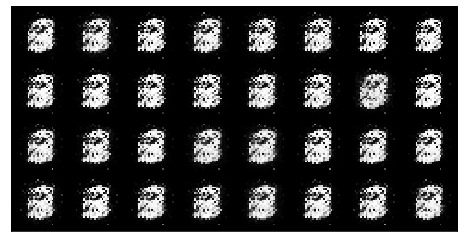

Epoch:1,   G_loss:5.946249570927894,   D_loss:0.035626973229041424


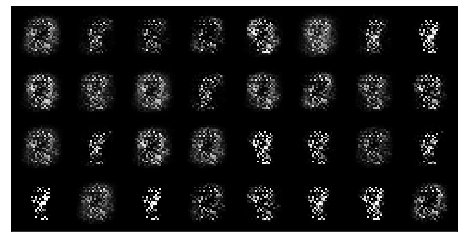

Epoch:2,   G_loss:5.434990533887705,   D_loss:0.06993398680460891


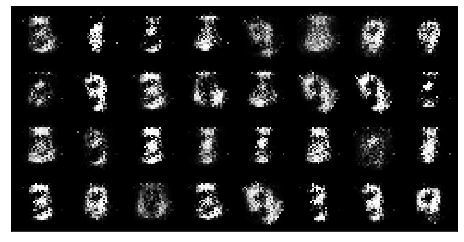

Epoch:3,   G_loss:5.521110241601208,   D_loss:0.12390578701210492


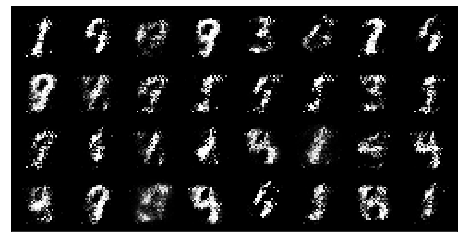

Epoch:4,   G_loss:5.136668308457332,   D_loss:0.16569498570552513


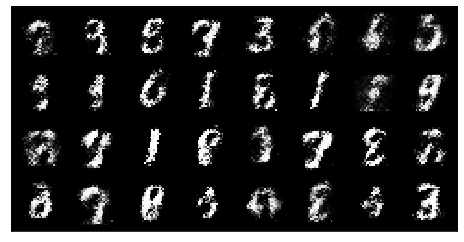

Epoch:5,   G_loss:4.815299887392821,   D_loss:0.24497622704264452


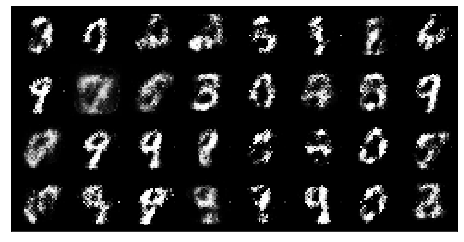

Epoch:6,   G_loss:4.0288618736938115,   D_loss:0.37848958150664375


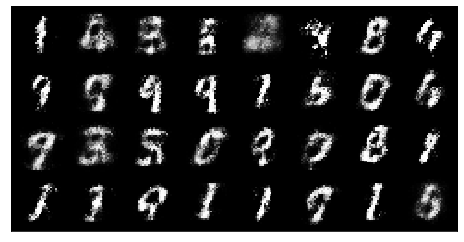

Epoch:7,   G_loss:3.6601611091129818,   D_loss:0.5044352517548655


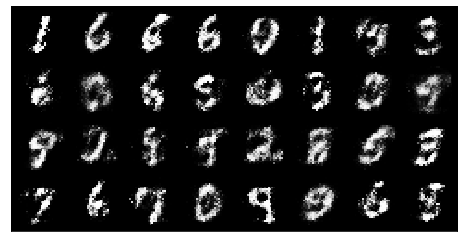

Epoch:8,   G_loss:3.354925617607418,   D_loss:0.580196425000996


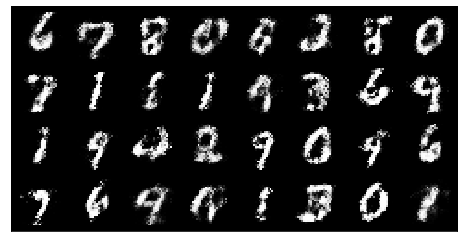

Epoch:9,   G_loss:2.853954217454264,   D_loss:0.6510416510771079


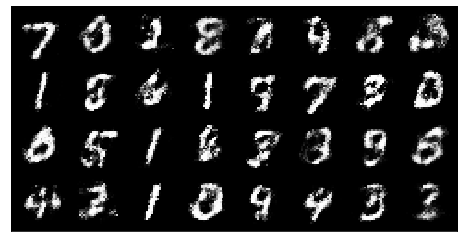

Epoch:10,   G_loss:2.526516232155025,   D_loss:0.7097223938337521


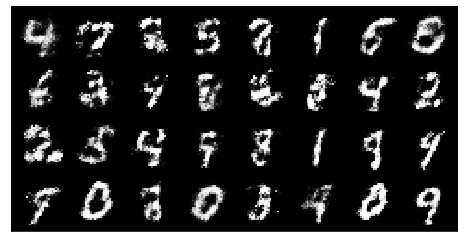

Epoch:11,   G_loss:2.499799367461377,   D_loss:0.7293764756305385


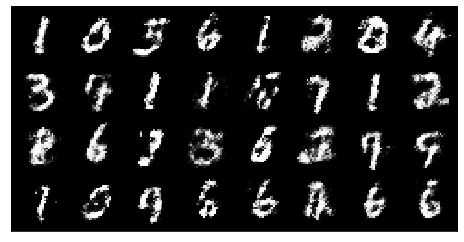

Epoch:12,   G_loss:2.314228592523888,   D_loss:0.7694822135828198


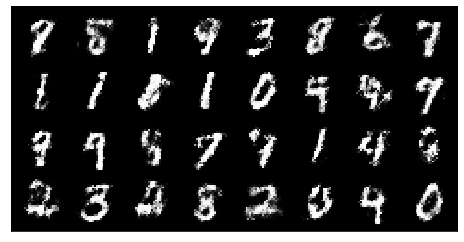

Epoch:13,   G_loss:2.1538830178378743,   D_loss:0.8015707705511468


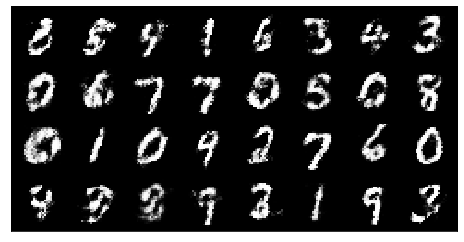

Epoch:14,   G_loss:2.032762041224091,   D_loss:0.8342482121323725


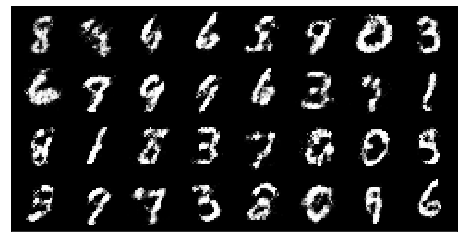

Epoch:15,   G_loss:1.9160043062177547,   D_loss:0.8474841799690271


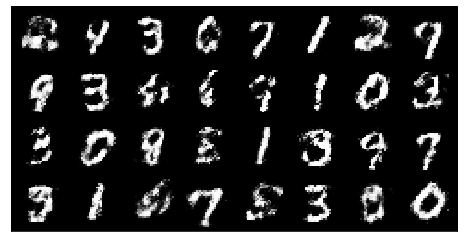

Epoch:16,   G_loss:1.850789071781549,   D_loss:0.8533050908462834


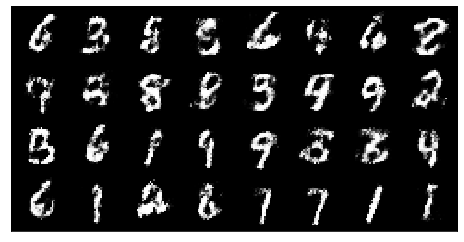

Epoch:17,   G_loss:1.8193100209175141,   D_loss:0.8528847314401476


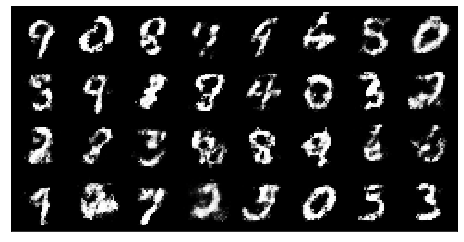

Epoch:18,   G_loss:1.8245953459983695,   D_loss:0.8516979622307108


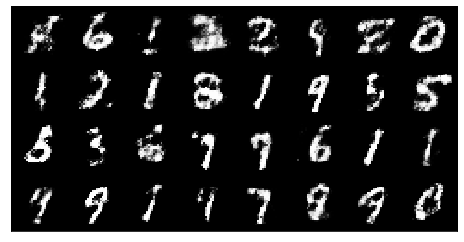

Epoch:19,   G_loss:1.7897798680801635,   D_loss:0.859168934669576


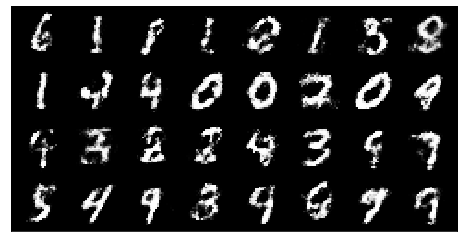

Epoch:20,   G_loss:1.7847275949998704,   D_loss:0.854421551325428


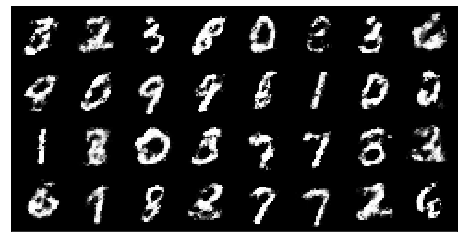

Epoch:21,   G_loss:1.8138618305293737,   D_loss:0.8538551296887875


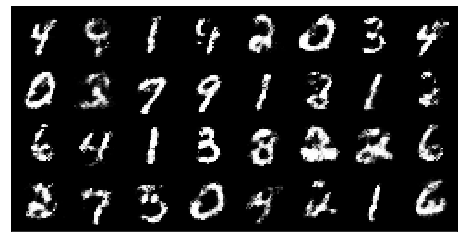

Epoch:22,   G_loss:1.7930375232117008,   D_loss:0.8597724010695272


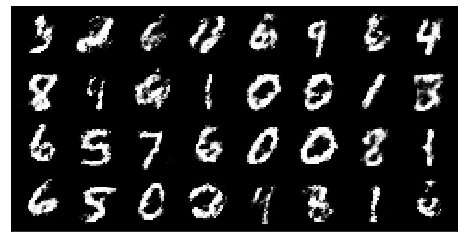

Epoch:23,   G_loss:1.770987981163871,   D_loss:0.8669017752858875


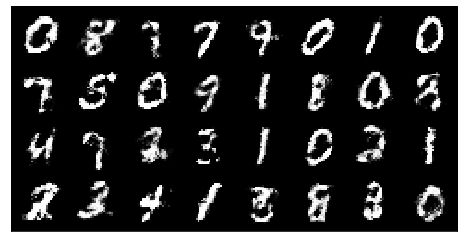

Epoch:24,   G_loss:1.7755955878351288,   D_loss:0.8611760217624941


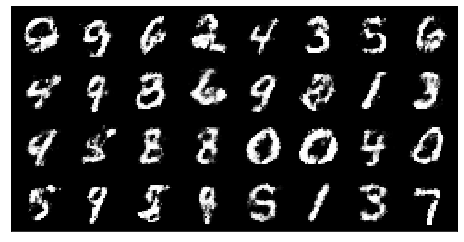

Epoch:25,   G_loss:1.7209736878938005,   D_loss:0.8741903842639313


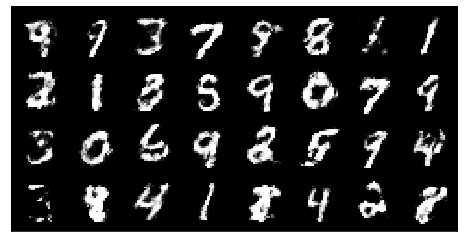

Epoch:26,   G_loss:1.7156016839338517,   D_loss:0.8701934907227945


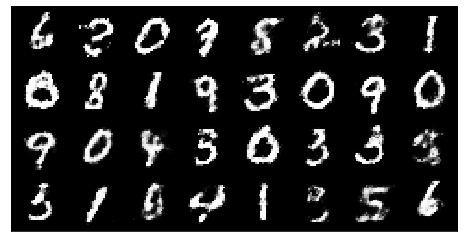

Epoch:27,   G_loss:1.7155257917162199,   D_loss:0.873122989623023


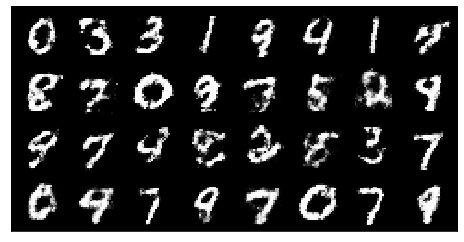

Epoch:28,   G_loss:1.7667760073757375,   D_loss:0.8608597506846446


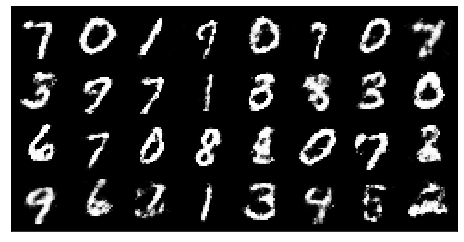

Epoch:29,   G_loss:1.760525839669364,   D_loss:0.8531449348179262


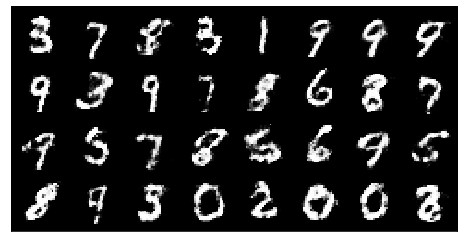

In [12]:
for epoch in range(30):
    G_loss_run = 0.0
    D_loss_run = 0.0
    for i,data in enumerate(trainloader):
        
        X, y = data
        #print(X.size())
        X = X.view(X.size(0), -1)
        y = y.view(y.size(0), -1)
        y = to_onehot(y)
        mb_size = X.size(0)
        #print(mb_size)
        
        # Definig labels for real (1s) and fake (0s) images
        one_labels = torch.ones(mb_size, 1)
        zero_labels = torch.zeros(mb_size, 1)
        
        # Random normal distribution for each image
        z = torch.randn(mb_size, Z_dim)
        
        
        # Feed forward in discriminator both 
        # fake and real images
        D_real = D.forward(X,y)
        # fakes = G(z)
        D_fake = D.forward(G(z,y),y)
        
        # Defining the loss for Discriminator
        D_real_loss = F.binary_cross_entropy(D_real, one_labels)
        D_fake_loss = F.binary_cross_entropy(D_fake, zero_labels)
        D_loss = D_fake_loss + D_real_loss
        
        # backward propagation for discriminator
        D_solver.zero_grad()
        D_loss.backward()
        D_solver.step()
        
        # Feed forward for generator
        z = torch.randn(mb_size, Z_dim)
        D_fake = D(G(z,y),y)
        
        # loss function of generator
        G_loss = F.binary_cross_entropy(D_fake, one_labels)
        
        # backward propagation for generator
        G_solver.zero_grad()
        G_loss.backward()
        G_solver.step()
        
        G_losses.append(G_loss.item())
        D_losses.append(D_loss.item())
        
        G_loss_run += G_loss.item()
        D_loss_run += D_loss.item()
        
    # printing loss after each epoch 
    print('Epoch:{},   G_loss:{},   D_loss:{}'.format(epoch, G_loss_run/(i+1), D_loss_run/(i+1) ))
    
    # Plotting fake images generated after each epoch by generator
    #print(G(z,y).shape)
    samples = G(z,y).detach()
    #print(samples.size())
    samples = samples.view(samples.size(0), 1, 28, 28)
    imshow(samples)
    
    
        

In [13]:
def get_sample_image(G, n_noise=100):
    """
        save sample 100 images
    """
    img = np.zeros([280, 280])
    for j in range(10):
        c = torch.zeros([10, 10])#.to(DEVICE)
        c[:, j] = 1
        z = torch.randn(10, n_noise)#.to(DEVICE)
        y_hat = G(z,c).view(10, 28, 28)
        result = y_hat.cpu().data.numpy()
        img[j*28:(j+1)*28] = np.concatenate([x for x in result], axis=-1)
    return img

In [14]:
def imshow(imgs):
    """ Visualizing images """
    # make_grid will make a grid out of images
    #imgs = torchvision.utils.make_grid(imgs)
    
    # transfoming tensors to numpy arrays
    #npimgs = imgs.numpy()
    plt.figure(figsize=(10,10))
    plt.imshow(imgs, cmap='Greys_r')
    plt.xticks([])
    plt.yticks([])
    plt.show()


In [15]:
imgs = get_sample_image(G, 100)
imgs.shape

(280, 280)

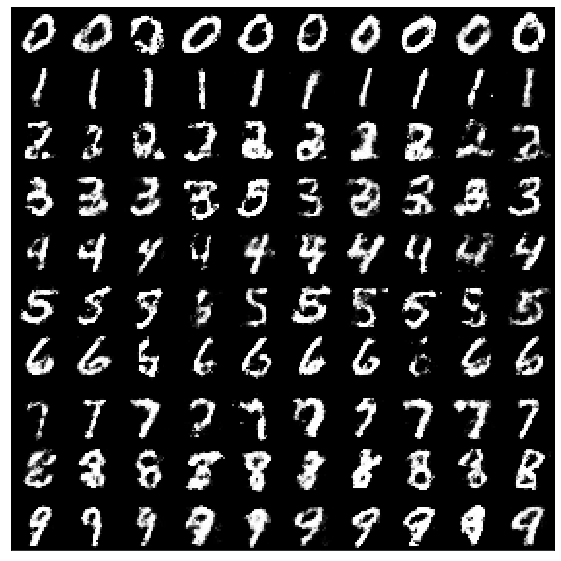

In [16]:
imshow(imgs)

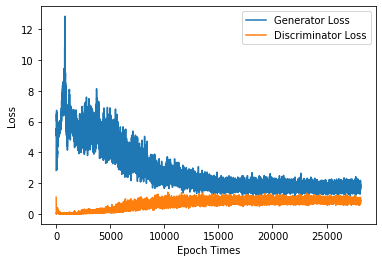

In [19]:
plt.plot(G_losses,label='Generator Loss')
plt.plot(D_losses,label='Discriminator Loss')
plt.legend()
plt.xlabel('Epoch Times')
plt.ylabel('Loss')
plt.show()